# Setup

In [1]:
from progpy import create_discrete_state

# Example 1: Random Transition

In [2]:
# Setup
StateType = create_discrete_state(10)
x = StateType(1)
print(x)

Discrete State.State 1


In [3]:
# Less than transition
x + 0.4

<Discrete State.State 1: 1>

In [4]:
# Greater than transition
x + 0.51

<Discrete State.State 7: 7>

In [5]:
# Repeat: Greater than transition
x + 0.51

<Discrete State.State 5: 5>

# Example 2: Sequential

In [6]:
# Setup
StateType = create_discrete_state(10, transition='sequential')
x = StateType(1)
print(x)

Discrete State.State 1


In [7]:
# Less than transition
x + 0.4

<Discrete State.State 1: 1>

In [8]:
# Greater than transition
x + 0.51

<Discrete State.State 2: 2>

In [9]:
# Again - Greater than transition
x + 0.51

<Discrete State.State 2: 2>

In [10]:
# Double transition
x + 0.51 + 0.51

<Discrete State.State 3: 3>

In [11]:
# Transition by more than 1
x + 1.51

<Discrete State.State 3: 3>

# Example 3: Custom Transition

In [12]:
import random
def transition(current_state, amount_added):
    # this is an example function- in reality it could be anything
    # Transition in this case is from 1-> any state and
    #  if not in state 1 can only transition back to 1
    if current_state == type(current_state)(1) and amount_added > 0.5:
        return random.randint(0, len(type(current_state))-1)
    elif amount_added > 0.5:
        return 1
    # No transition
    return current_state

In [13]:
# Setup
StateType = create_discrete_state(10, transition=transition)
x = StateType(1)
print(x)

Discrete State.State 1


In [14]:
# below transition amount
x + 0.49

<Discrete State.State 1: 1>

In [15]:
# State 1 can transition to anything
x + 0.51

<Discrete State.State 4: 4>

In [16]:
# Again - State 1 can transition to anything
x + 0.51

<Discrete State.State 7: 7>

In [17]:
# Any state other than 1 will always transition to 1
StateType(2) + 0.51

<Discrete State.State 1: 1>

# Example 4: Integration into progpy

Example filling tank with valve which can be open/closed

In [25]:
from progpy.models.test_models.tank_model import Tank, ValveState
m = Tank()

In [26]:
def stupid_load(t, x=None):
    # Doesn't open valve
    if x is None:
        return m.InputContainer({'q_in': 0.1, 'valve_command': ValveState.closed})
    return m.InputContainer({'q_in': 0.1, 'valve_command': x['valve']})

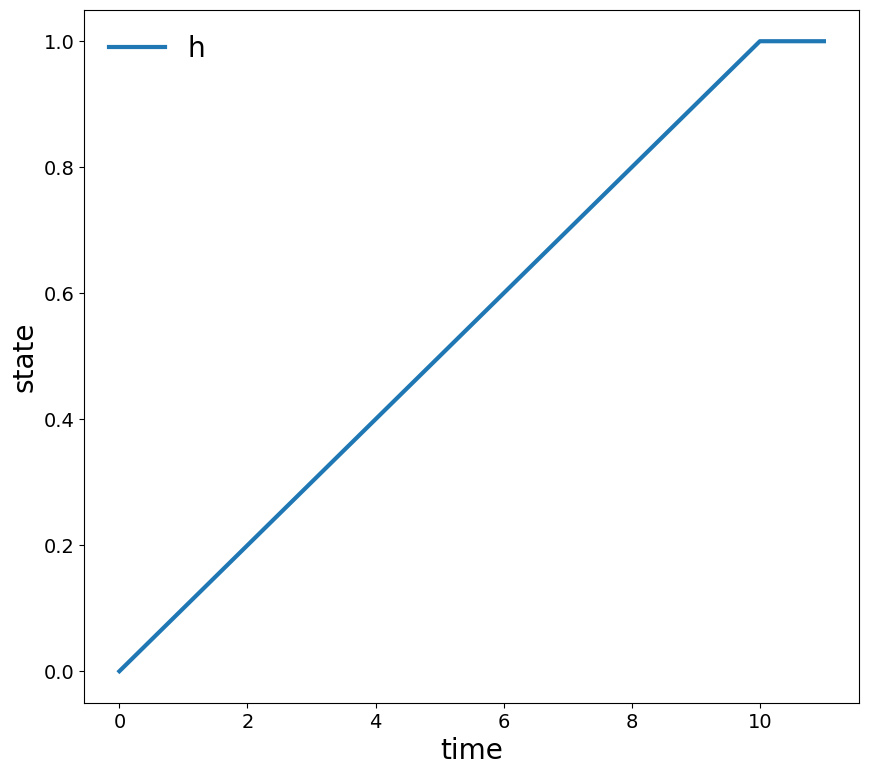

In [27]:
result = m.simulate_to_threshold(stupid_load, events='full', save_freq=1, horizon=25)
fig = result.outputs.plot()

In [28]:
def smart_load(t, x=None):
    if x is None:
        # First step
        return m.InputContainer({'q_in': 0.1, 'valve_command': ValveState.closed})

    if (x['valve'] == ValveState.closed) and (x['h'] >= m['height']*0.8):
        # If closed, open at 80% full
        return m.InputContainer({'q_in': 0.1, 'valve_command': ValveState.open})
    elif (x['valve'] == ValveState.open) and (x['h'] <= m['height']*0.6):
        # If open, close at 60% full
        return m.InputContainer({'q_in': 0.1, 'valve_command': ValveState.closed})
    
    # Default- dont control valve
    return m.InputContainer({'q_in': 0.1, 'valve_command': x['valve']})
    

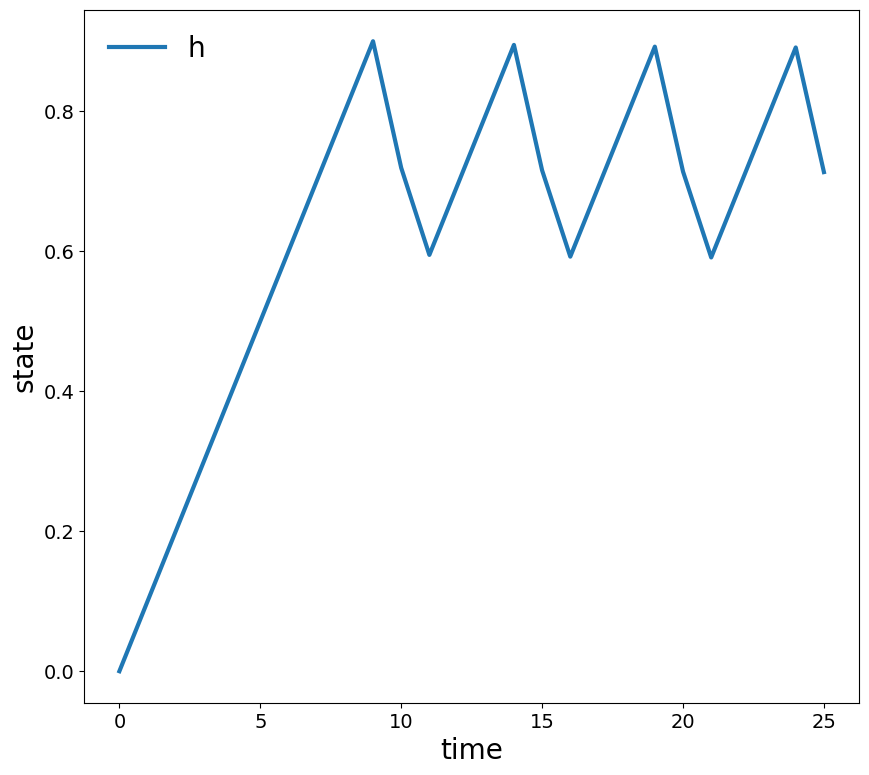

In [29]:
result = m.simulate_to_threshold(smart_load, events='full', save_freq=1, horizon=25)
fig = result.outputs.plot()

Now With noise!

In [30]:
m['process_noise'] = m.StateContainer({'valve': 1, 'h': 0})
m['process_noise_dist'] = 'uniform' # will switch the valve 33% of the time

This will randomly open and close the valve

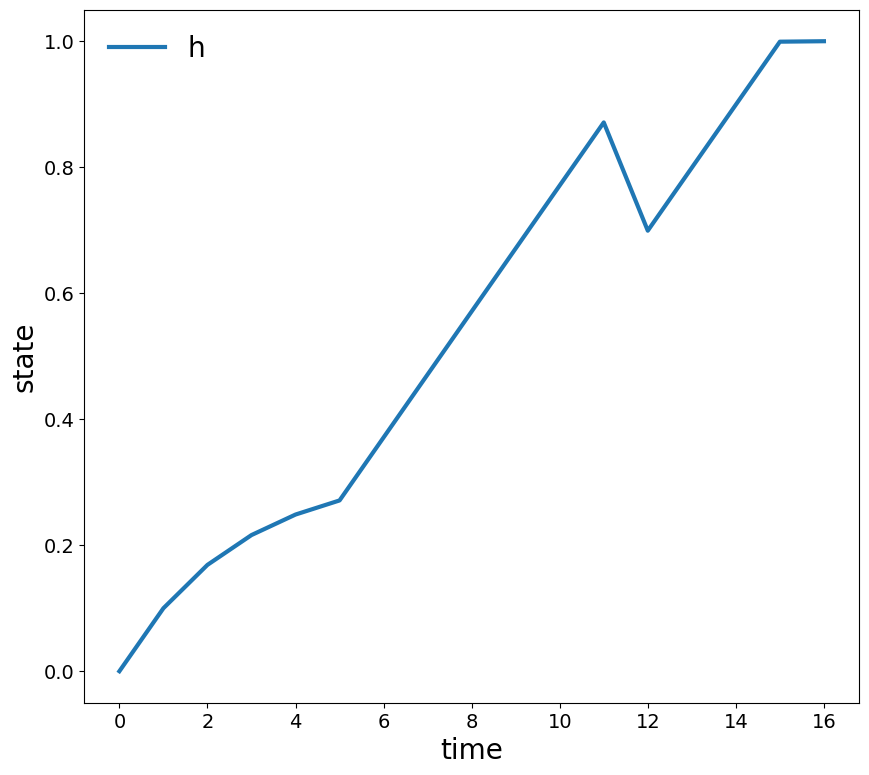

In [31]:
result = m.simulate_to_threshold(stupid_load, events='full', save_freq=1, horizon=25)
fig = result.outputs.plot()